# Aviation Industry Expansion

<center><img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*4_HaFNNr4Zw-7xuH7kK-8Q.png"></center>

# Business Understanding

Our company is *expanding* by **purchasing and operating airplanes** for commercial and private enterprises. In this analysis, I determine which aircraft is the **lowest risk** for the company to start this new business endeavor. I use the fatal injuries rate, uninjured rate, and total number of injuries as meaures of safety and investigate the effect the make of the aircraft, the number of engines, and the model have on these safety parameters.

I investigate the following three business questions:
1. What is the safest aircraft **make**?
2. What is the safest **number of engines** for an aircraft?
3. What is the safest aircraft **model**?

# Data Understanding

<center><img src="https://www.datasciencecentral.com/wp-content/uploads/2023/10/AdobeStock_623805808.jpeg" style="height:400px" /></center>

The [Aviation Accident Database & Synopses, up to 2023](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses/data) from the NTSB (National Transportation Safety Board) aviation accident database contains information about ​**civil aviation accidents and selected incidents** that occurred between 1962 and 2023 within the United States, its territories and possessions, and in international waters. From this database, I analyze the number of injuries, the make of the aircrafts, the number of engines on the aircrafts, and the model of the aircrafts to determine our first step in the expansion of the aviation industry.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.options.mode.copy_on_write = True

In [2]:
aviation_df = pd.read_csv('data/AviationData.csv', encoding='latin', low_memory=False)

## Data Preparation

The dataset has approximately 89,000 accidents and incidents. All but 4 columns have varying numbers of null values. There are over 12,000 unique models and over 8,000 unique makes. These will have to be greatly narrowed down to determine a recommended make and model.

In [3]:
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [5]:
# Count of how many null values are in each column
aviation_df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [6]:
# Provide descriptive statistics for the numerical data columns
aviation_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [7]:
# Number of unique models
aviation_df['Model'].nunique()

12318

In [8]:
# Number of unique makes
aviation_df['Make'].nunique()

8237

In [9]:
# Print a count of the top 5 values in each column
# This code is commented out due to the lengthy output, but it includes the ratios of the top 5 values of each column in the dataset.
# for col in aviation_df.columns:
    # print(col, '\n', aviation_df[col].value_counts(normalize=True).head(), '\n\n')

## Data Cleaning

Before beginning any type of analysis, I must clean the dataset. 
1. I check for **duplicates** (there are none).
2. I **drop columns** that will not be useful to my analysis.
3. I standardize the **column names**, **make names**, and select **model names**. 
4. I **create 3 more columns** that will be useful during the analysis: Total_Passengers, Fatal_Injuries_Rate, Uninjured_Rate.
5. I **drop na's** from columns that include number or rates of injuries, fatalities or uninjured because without those numbers, I will not be able to determine safety.

In [10]:
# Make a copy of the dataset to clean
aviation_clean = aviation_df.copy()

In [11]:
# Check for duplicates
duplicates = aviation_clean[aviation_clean.duplicated()]
len(duplicates)

0

In [12]:
# Clean column names by replacing '.' in column names with '_'
aviation_clean.columns = aviation_clean.columns.map(lambda x: x.replace('.', '_',).title())

In [13]:
# Rewrite 'Makes' in title case
aviation_clean['Make'] = aviation_clean['Make'].map(lambda x: str(x).title())

In [14]:
# Cast model numbers to string, as some are type float, and replace spaces with dash
aviation_clean['Model'] = aviation_clean['Model'].map(lambda x: str(x).replace(' ', '-'))

In [15]:
# Drop unuseful columns
# I kept many columns I did not use in my final analysis, as I experimented with many of the columns
aviation_clean.drop(columns=['Latitude', 'Longitude', 'Schedule', 'Air_Carrier', 'Aircraft_Category', 'Far_Description'], inplace=True)

In [16]:
# Create a column with Total Number of Passengers
aviation_clean['Total_Passengers'] = aviation_clean['Total_Fatal_Injuries'] + aviation_clean['Total_Serious_Injuries'] \
    + aviation_clean['Total_Minor_Injuries'] + aviation_clean['Total_Uninjured']

# Create a column with proportion of fatal injuries per accident
aviation_clean['Fatal_Injuries_Rate'] = aviation_clean['Total_Fatal_Injuries'] / aviation_clean['Total_Passengers']

# Create a column with proportion of uninjured per accident
aviation_clean['Uninjured_Rate'] = aviation_clean['Total_Uninjured'] / aviation_clean['Total_Passengers']

In [17]:
# NaNs are caused by dividing by 0
aviation_clean[aviation_clean['Fatal_Injuries_Rate'].isna()].sample(10)

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Airport_Code,Airport_Name,Injury_Severity,Aircraft_Damage,...,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_Phase_Of_Flight,Report_Status,Publication_Date,Total_Passengers,Fatal_Injuries_Rate,Uninjured_Rate
88853,20221207106430,Accident,WPR23LA059,2022-12-07,"Ft Worth, TX",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
62382,20070517X00574,Accident,CHI07LA113,2007-04-22,"COTTER, AR",United States,61AR,The Valley Airport,Fatal(2),Substantial,...,NaN,NaN,NaN,VMC,Approach,Probable Cause,28-02-2008,NaN,NaN,NaN
52808,20020618X00923,Accident,CHI02LA165,2002-06-15,"Virginia, MN",United States,NaN,NaN,Non-Fatal,Destroyed,...,NaN,NaN,1.0,VMC,Cruise,Probable Cause,18-04-2003,NaN,NaN,NaN
29117,20001212X18014,Accident,ANC91LA155,1991-09-19,"EAGLE, AK",United States,EAA,EAGLE,Non-Fatal,Substantial,...,NaN,NaN,1.0,VMC,Takeoff,Probable Cause,09-12-2011,NaN,NaN,NaN
43265,20001211X09413,Accident,DCA98RA016,1998-01-09,"LONDON, United Kingdom",United Kingdom,NaN,NaN,Non-Fatal,Minor,...,1.0,4.0,87.0,UNK,NaN,Foreign,NaN,NaN,NaN,NaN
51991,20020122X00093,Accident,DEN02LA019,2002-01-11,"AURORA, CO",United States,NaN,NaN,Non-Fatal,Substantial,...,NaN,NaN,3.0,VMC,Descent,Probable Cause,06-12-2002,NaN,NaN,NaN
62018,20070307X00258,Accident,ATL07CA037,2007-02-03,"GRIFFIN, GA",United States,6A2,GRIFFIN-SPALDING COUNTY,Non-Fatal,Substantial,...,NaN,NaN,3.0,VMC,Maneuvering,Probable Cause,25-04-2007,NaN,NaN,NaN
52525,20020514X00674,Accident,NYC02LA092,2002-05-05,"SARATOGA SPRING, NY",United States,5B2,Saratoga Springs,Non-Fatal,Substantial,...,NaN,NaN,2.0,VMC,Descent,Probable Cause,25-06-2003,NaN,NaN,NaN
54020,20030110X00050,Accident,FTW03LA080,2003-01-09,"PUTNAM, TX",United States,NaN,NaN,Non-Fatal,Substantial,...,1.0,NaN,NaN,VMC,Cruise,Probable Cause,29-09-2004,NaN,NaN,NaN
54723,20030605X00792,Accident,LAX03LA173,2003-05-30,"Tracy, CA",United States,1Q4,New Jeruselem,Fatal(1),Destroyed,...,NaN,NaN,NaN,VMC,Maneuvering,Probable Cause,28-12-2004,NaN,NaN,NaN


In [18]:
# Clean NaNs from columns with numbers of injured/injured and rates
# I will remove all of the NaNs because without injury and fatality reports, I will not be able to determine safey
aviation_clean.dropna(subset=['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured', \
                              'Fatal_Injuries_Rate', 'Uninjured_Rate'], inplace=True)

I subset my data further into **top_4_makes**. This is a subset of the 4 most common manufacturers according to [Forbes](https://www.forbes.com/sites/geoffwhitmore/2019/08/16/what-is-the-safest-airplane-to-fly/?sh=1fee35415c72). I standardize the names of the 4 manufacturers.

In [19]:
# Create new dataframe from aviation_clean with top 4 models. I chose the most common manufacturers according to Forbes.
top_4_makes = aviation_clean[aviation_clean['Make'].str.contains('|'.join(['Boeing', 'Airbus', 'Bombardier', 'Embraer']))]
top_4_makes.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Airport_Code,Airport_Name,Injury_Severity,Aircraft_Damage,...,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_Phase_Of_Flight,Report_Status,Publication_Date,Total_Passengers,Fatal_Injuries_Rate,Uninjured_Rate
50,20020917X02242,Accident,LAX82DVA10,1982-01-06,"NEAR BAKERSFIEL, CA",United States,NaN,NaN,Non-Fatal,Substantial,...,1.0,0.0,1.0,IMC,Cruise,Probable Cause,06-01-1983,2.0,0.000000,0.5
80,20020917X01765,Incident,ATL82IA034,1982-01-12,"CLARKSBURG, WV",United States,CKB,BENEDUM,Incident,Minor,...,0.0,0.0,2.0,VMC,Taxi,Probable Cause,12-01-1983,2.0,0.000000,1.0
84,20020917X01907,Accident,DCA82AA011,1982-01-13,"WASHINGTON, DC",United States,NaN,WASHINGTON NATIONAL,Fatal(78),Destroyed,...,6.0,3.0,0.0,IMC,Takeoff,Probable Cause,13-01-1983,87.0,0.896552,0.0
242,20020917X02585,Accident,SEA82DA028A,1982-02-06,"MEDFORD, OR",United States,MFR,MEDFORD-JACKSON COUNTY,Non-Fatal,Minor,...,0.0,0.0,3.0,VMC,Taxi,Probable Cause,06-02-1983,3.0,0.000000,1.0
320,20020917X02336,Incident,LAX82IA075,1982-02-15,"ONTARIO, CA",United States,ONT,ONTARIO INTERNATIONAL,Incident,Minor,...,0.0,0.0,119.0,IMC,Approach,Probable Cause,15-02-1983,119.0,0.000000,1.0


In [20]:
# View the different variations of the make names
top_4_makes['Make'].value_counts()

Make
Boeing                            1736
Embraer                            164
Airbus                             152
Airbus Industrie                    89
Bombardier Inc                      56
Bombardier                          39
Boeing Stearman                     33
Airbus Helicopters                  13
Bombardier, Inc.                     8
Embraer S A                          7
Embraer-Empresa Brasileira De        6
Boeing Vertol                        5
Airbus Helicopters Inc               3
The Boeing Company                   3
Embraer S.A.                         2
Boeing - Canada (De Havilland)       2
Boeing Company                       2
Bombardier Canadair                  1
Embraer Sa                           1
Airbus Helicopters Deutschland       1
Embraer Executive Aircraft Inc       1
Airbus Helicopters (Eurocopte        1
Boeing-Vertol                        1
Airbus Helicopter                    1
Airbus/Eurocopter                    1
Boeing-Stearman     

In [21]:
# Create a function to standardize the aircraft names

def standardize_aircraft_name(name):
    '''
    This function takes in the name of an aircraft manufacturer and outputs the standardized name if it includes Boeing, 
    Airbus, Embraer, or Bombardier. Otherwise, it outputs the inputted name.
    
    Parameter:
        name - The name of the aircraft manufacturer
        
    Returns:
        new_name - The standardized version of the name, or the inputted name if it is not one of the 4 specified manufacturers
    '''
    
    if 'Boeing' in name:
        new_name = name.replace(name, 'Boeing')
    elif 'Airbus' in name:
        new_name = name.replace(name, 'Airbus')
    elif 'Embraer' in name:
        new_name = name.replace(name, 'Embraer')
    elif 'Bombardier' in name:
        new_name = name.replace(name, 'Bombardier')
    else:
        new_name = name
    return new_name

In [22]:
# I noticed there were variations of Make names, so I will standardize the names
top_4_makes['Make'] = top_4_makes['Make'].map(lambda x: standardize_aircraft_name(x))

In [23]:
# Check that function worked correctly
top_4_makes['Make'].value_counts()

Make
Boeing        1786
Airbus         261
Embraer        182
Bombardier     105
Name: count, dtype: int64

In [24]:
# Some models are duplicated due to formatting issues. The following models are found to be the safest through my EDA below.
# I clean the model names that have a 100% uninjured rate and add them to the safest_models list. This is being added here so these changes
# can be implemented when the file is exported.



# Merge like models
top_4_makes['Model'] = top_4_makes['Model'].map(lambda x: 'DHC-8' if x == 'DHC8' else x)
top_4_makes['Model'] = top_4_makes['Model'].map(lambda x: 'CL-600' if x == 'CL600' else x)
top_4_makes['Model'] = top_4_makes['Model'].map(lambda x: 'CL-600-2B19' if x == 'CL600-2B19' else x)
top_4_makes['Model'] = top_4_makes['Model'].map(lambda x: 'BD-700-1A10' if x == 'BD700-1A10' else x)
top_4_makes['Model'] = top_4_makes['Model'].map(lambda x: 'BD-100-1A10' if x == 'BD100-1A10' else x)
top_4_makes['Model'] = top_4_makes['Model'].map(lambda x: 'CL600-2D24-900' if x == 'CL600-2D24---900' else x)

safest_models = ['35A', 'BD-700-1A10', 'CL-600', 'DHC-8-315', 'CL-600-2B1', 'DHC-8-202',
    'CL-600-2C1', 'DHC-8', 'CL600-2D24---900']

In [25]:
# The new data set has  2,334 records
top_4_makes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2334 entries, 50 to 88867
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event_Id                2334 non-null   object 
 1   Investigation_Type      2334 non-null   object 
 2   Accident_Number         2334 non-null   object 
 3   Event_Date              2334 non-null   object 
 4   Location                2330 non-null   object 
 5   Country                 2328 non-null   object 
 6   Airport_Code            1258 non-null   object 
 7   Airport_Name            1315 non-null   object 
 8   Injury_Severity         2334 non-null   object 
 9   Aircraft_Damage         1457 non-null   object 
 10  Registration_Number     2293 non-null   object 
 11  Make                    2334 non-null   object 
 12  Model                   2334 non-null   object 
 13  Amateur_Built           2334 non-null   object 
 14  Number_Of_Engines       1871 non-null   flo

In [26]:
# Export the clean data frame using df.to_csv() and upload to tableau to produce visuals

top_4_makes.to_csv('data/top_4_makes.csv')

# Exploratory Data Analysis

In [27]:
sns.set(style='whitegrid', context='notebook')

## *Make* Analysis

I began with comparing the top 4 aircraft makes with the **average number of injuries** per accident. Bombardier has the *least* average number of total injuries and the *least* average number of fatal injuries. Airbus has the *highest* average number of total injuries and the *highest* average numbers of fatal injuries.

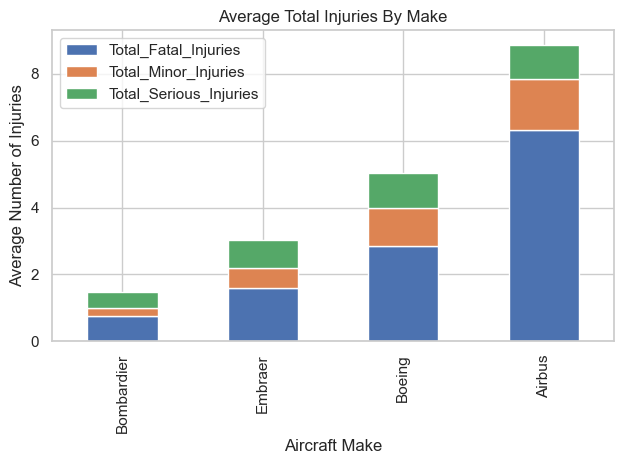

In [28]:
# Create stacked bar plot
ax = top_4_makes.groupby(['Make'])[['Total_Fatal_Injuries', 'Total_Minor_Injuries', 'Total_Serious_Injuries']]\
    .mean().sort_values(by='Total_Fatal_Injuries', ascending=True).head().plot(kind='bar', stacked=True)
ax.set_title('Average Total Injuries By Make')
ax.set_xlabel('Aircraft Make')
ax.set_ylabel('Average Number of Injuries');
plt.tight_layout()
plt.savefig('inj_by_make.png')

Next, I analyzed the **fatality rates** by make. Boeing and Bombardier hold the *lowest* fatality rates out of the top for manufacturers, while Embraer has the *highest* fatality rate among the four.

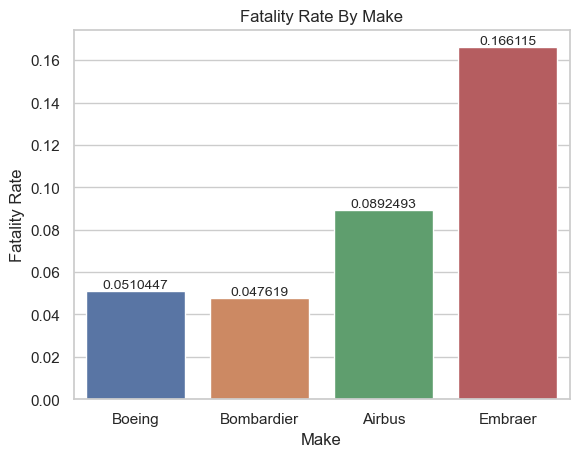

In [52]:
# Create bar plot
ax = sns.barplot(data=top_4_makes.sort_values('Fatal_Injuries_Rate'), 
                 x='Make', 
                 y='Fatal_Injuries_Rate',
                 errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);
ax.set(xlabel='Make', ylabel='Fatality Rate', title='Fatality Rate By Make');

Lastly, I analyzed the **uninjured rate** by make. Bombardier came out on *top*, with a 93% uninjured rate. The remaining three manufacturers fall below this, ranging from approximately 77% to 88%.

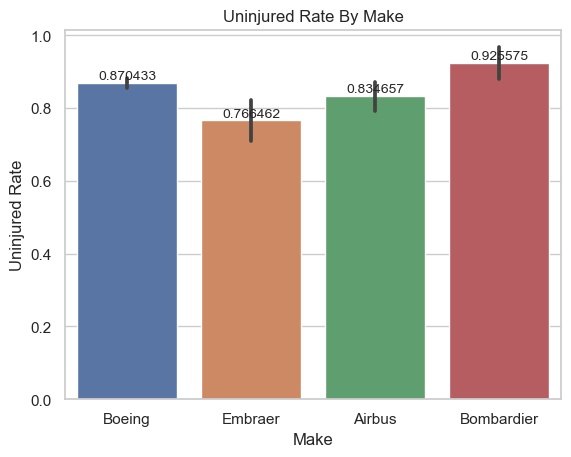

In [53]:
# Create bar plot
ax = sns.barplot(data=top_4_makes, x='Make', y='Uninjured_Rate')
ax.bar_label(ax.containers[0], fontsize=10);
ax.set(xlabel='Make', ylabel='Uninjured Rate', title='Uninjured Rate By Make');

## Number of Engines Analysis

Aircrafts with **3 engines** hold both the *highest* uninjured rate and the *lowest* fatality rate, followed by aircrafts with 2 engines, aircrafts with 4 engines, aircafts with 1 engine, and lastly, aircrafts with 0 engines. Aircrafts with 0 engines (gliders) have the *lowest* uninjured rate and the *highest* fatality rate.

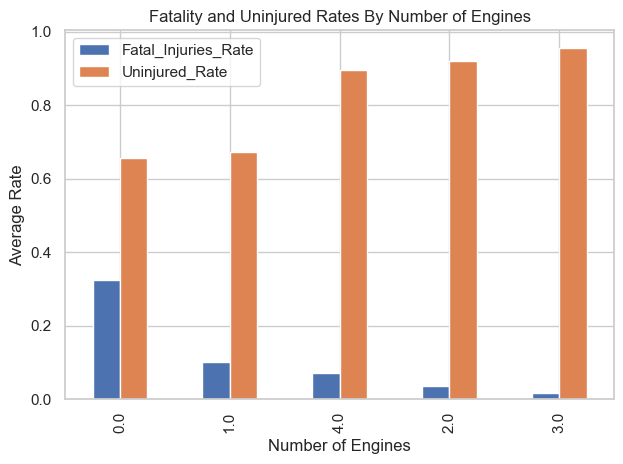

In [31]:
# Create bar plot
ax = top_4_makes.groupby(['Number_Of_Engines'])[['Fatal_Injuries_Rate', 'Uninjured_Rate']]\
    .mean().sort_values(by='Uninjured_Rate', ascending=True).plot(kind='bar', stacked=False);
ax.set(xlabel='Number of Engines', ylabel='Average Rate', title='Fatality and Uninjured Rates By Number of Engines');
plt.tight_layout()
plt.savefig('rates_by_eng.png')

In [59]:
# Bombardier aircrafts only come with 1 or 2 engines. According to the data, 2 engines are safer than one. I recommend we purchase 
# a Bombardier aircraft with 2 engines.
make_options = top_4_makes['Model'][(top_4_makes['Make']=='Bombardier') & (top_4_makes['Number_Of_Engines']==2)]
num_make_options = make_options.nunique()
print(f'There are {num_make_options} double engine Bombardier aircrafts to choose from.')

There are 19 double engine Bombardier aircrafts to choose from.


## *Model* Analysis

The aircrafts have been narrowed down to Bombardier 2-engine aircrafts. Upon the *model* analysis, I first narrowed down to 9 models that had a 100% uninjured rate. Then I determined the most popular aircraft model by counting how many entries each of the models had in the data. The **CL-600** had the **highest** count. Although this dataset does not have a record of *all* flights, I am assuming the CL-600 has the highest number of occurences due to its popularity. This assumption is supported by the fact that the Bombardier 2-engine aircrafts are proven to be safe, and all accidents with this model have a 100% uninjured rate.

In [58]:
# This is a list of all the double engine Bombardier aicrafts in our dataset. 
top_4_makes[(top_4_makes['Make']=='Bombardier') & (top_4_makes['Number_Of_Engines'] == 2)]['Model'].value_counts()

Model
CL-600-2B19       24
CL-600-2C10       14
DHC-8-402          7
CL-600-2B16        7
CL600-2D24         7
BD-100-1A10        6
CL-600             5
DHC-8-202          2
DHC-8              2
BD-700-1A10        2
CL600-2C10         2
CRJ                2
35A                2
CL-600-2B1         1
CL-600-2C1         1
DHC-8-315          1
CL-600-1A11        1
CL600-2D24-900     1
CL600-2A12         1
Name: count, dtype: int64

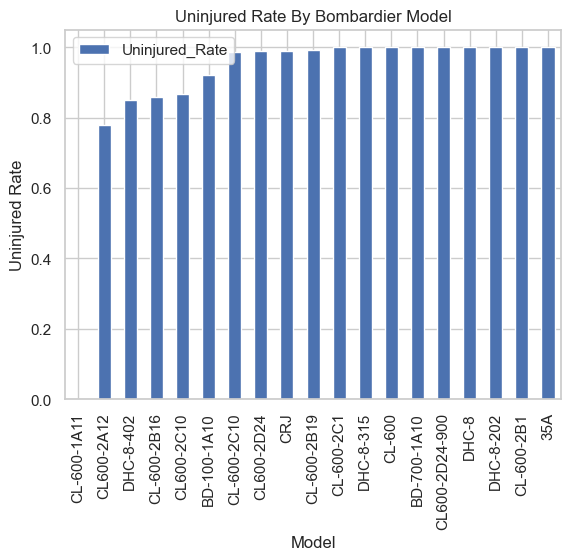

In [61]:
# Graph bar plot of Uninjured Rates by Bombardier Model

ax = top_4_makes[(top_4_makes['Make']=='Bombardier') & (top_4_makes['Number_Of_Engines'] == 2)].groupby(['Model'])\
    [['Uninjured_Rate']].mean().sort_values(by='Uninjured_Rate', ascending=True).plot(kind='bar', stacked=True)
ax.set(xlabel='Model', ylabel='Uninjured Rate', title='Uninjured Rate By Bombardier Model');

In [62]:
# 9 models with an uninjured rate of 100% to choose from
top_9_models = top_4_makes[(top_4_makes['Make']=='Bombardier') & (top_4_makes['Number_Of_Engines'] == 2)].groupby(['Model'])\
    [['Uninjured_Rate']].mean().sort_values(by='Uninjured_Rate', ascending=False)
top_9_models = top_9_models[top_9_models['Uninjured_Rate'] == 1.0]
top_9_models

,Uninjured_Rate
Model,
35A,1.0
BD-700-1A10,1.0
CL-600,1.0
DHC-8-315,1.0
CL-600-2B1,1.0
DHC-8-202,1.0
CL-600-2C1,1.0
DHC-8,1.0
CL600-2D24-900,1.0


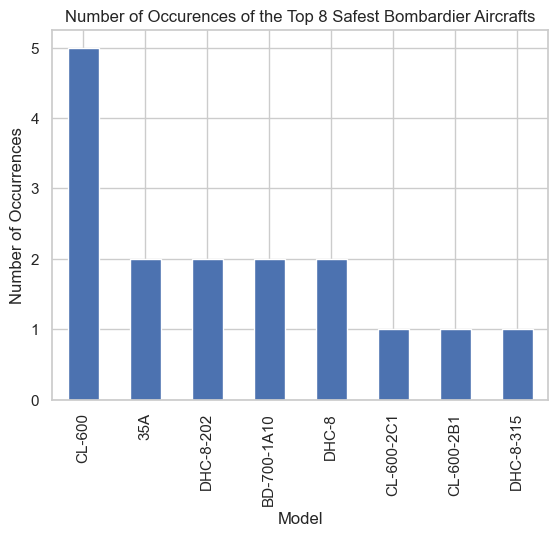

In [64]:
# Count the number of occurrences of each of the 9 safest aircraft models.

top_9_models_count = top_4_makes[top_4_makes['Model'].isin(safest_models)]
ax = top_9_models_count['Model'].value_counts().plot(kind='bar')
ax.set(xlabel='Model', ylabel='Number of Occurrences', title='Number of Occurences of the Top 8 Safest Bombardier Aircrafts');

IndexError: index 0 is out of bounds for axis 0 with size 0

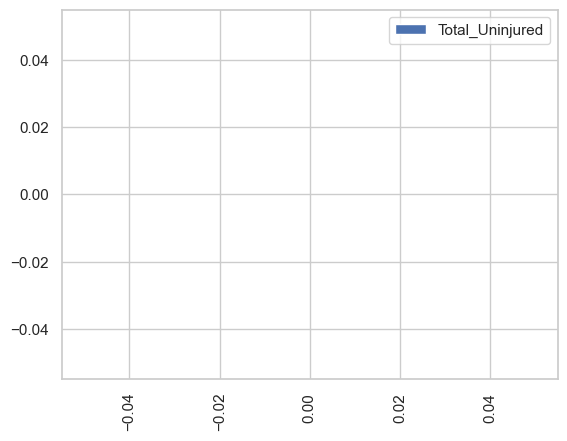

In [39]:
## DELETE
top_4_makes[(top_4_makes['Make']=='Bombardier') & (top_4_makes['Number_Of_Engines'] == 2) & (top_4_makes['Uninjured_Rate'] == 2)].groupby(['Model'])[['Total_Uninjured']]\
    .mean().sort_values(by='Total_Uninjured', ascending=True).plot(kind='bar', stacked=True)

# Conclusions

## Limitations

There are various limitations in this analysis.

1. I could not compute the **proportion of accidents to total number of flights**, as this data includes only records of accidents or incidents. This data does not include clean records of flights with no accidents or incidents. When recommending an aircraft company, aircraft model, or location of operation, I used the basis of which has the lowest number of accidents/incidents, with zero accidents/incidents not being an option.

2. I chose a **specific aircraft model** out of a list of the 8 safest models based on the number of occurrences in the data under the assumption that more occurrences equates to higher popularity of an aircraft. Alternatively, more occurrences can indicate an aircraft that has a high accident ratio. This would have to be calculated using a dataset of *all* flights, not just those with accident (as mentioned above). However, a better interpretation is that more accidents are due to more total flights. This is likely because the list of 8 aircrafts have already been determined to be the safest out of the dataset.

## Recommendations

This analysis has led me to conclude the following three recommendations: 
1. **Bombardier** is the aircraft manufacturer that I suggest we purchase. Bombardier has overall the least average number of injuries and the highest unijured rate when compared to Airbus, Boeing and Embraer.

2. I recommend we purchase a Bombardier aircraft with **2 engines**. Bombardier aircrafts only come with 1 or 2 engines. According to the data, 2-engine aircrafts have a *lower* fatality rate and a *higher* uninjured rate than 1-engine aircrafts.

3. The aircraft model of our first purchase should be a **CL-600**. This model is among Bombardier's safest 2-engine aircraft. It is a popular model, as it has the highest count among those safest aircrafts.

## Next Steps

In order to optimize ***profits*** for this new industry expansion, we must analyze the financial aspects by answering the following three questions: 

1. What **flight schedule** will provide the greatest profit? Consider seasonal, weekly, and daily schedules. 

2. **How many aircrafts** should we initially purchase? Consider *cost* of aircraft and operation of such aircraft.

3. What **location** should we operate out of? Consider chances of interrupted flight due to *weather*.